# Однофакторный дисперсионный анализ

В тех случаях, когда групп становится больше двух, t-критерий перестаёт быть нам полезен. Для таких случаев был создан дисперсионный анализ - он выполняет ту же функцию, но подходит для числа групп больше двух.

Требования к дисперсионному анализу:
1. Дисперсии внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Левена и критерия Бартлетта
2. Если объемы групп недостаточно большие (меньше 30) и не совпадают по размерам, то важно соблюдать требование о нормальности распределения выборок.

In [47]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
x1 = np.random.randint(120, 200, 30)
x2 = np.random.randint(20, 300, 30)
x3 = np.random.randint(140, 250, 30)

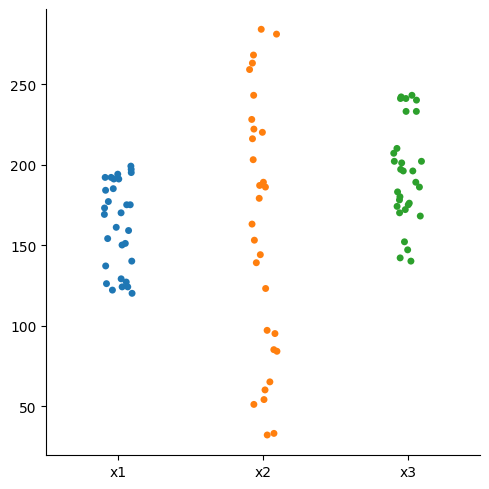

In [21]:
catplot1 = sns.catplot([x1, x2, x3])
catplot1.set_xticklabels(['x1', 'x2', 'x3'])

**Гипотезы:**

- $H_0$ – ни одно из выборочных средних не отличается от другого (нет различий)
- $H_1$ – **хотя бы одно** выборочное среднее отличается от других (есть различия как минимум между двумя группами)

In [23]:
from scipy.stats import f_oneway
f_oneway(x1, x2, x3)

F_onewayResult(statistic=3.9126336063641296, pvalue=0.023598816205962606)

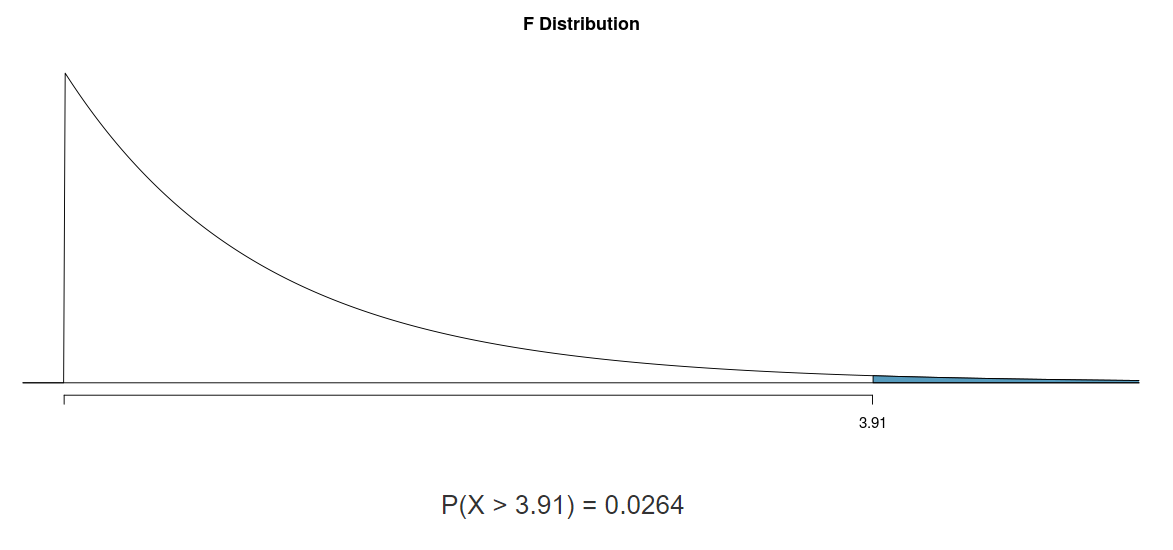

Дисперсионный анализ проверяет только общую гипотезу о том, что где-то есть различия в выборочных средних. Где они именно – нужно проверять отдельно, и об этом позднее.

## Множественные сравнения

Когда нам нужно сравнивать количество групп больше двух, мы неизбежно сталкиваемся с проблемой множественных сравнений. Это неприятный статистический эффект, когда из-за тестирования сразу нескольких гипотез разом вероятность ошибки I рода искусственно возрастает. Поэтому при увеличении количества групп необходимость сравнивать попарно каждую из них приводит к повышенной вероятности увидеть значимые различия там, где их нет. Оценить масштаб бедствия можно с помощью следующей формулы:
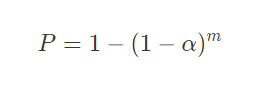

Здесь α – уровень значимости, m – количество тестируемых гипотез, а P – итоговая вероятность допущения ошибки I рода.

In [58]:
from scipy.special import comb  # чтобы найти m
P = 1 - (1 - 0.05) ** comb(3, 2)
P

0.1426250000000001

## Поправка Бонферрони

Нам нужно разделить уровень значимости на количество попарных сравнений, и считать различия значимыми только в том случае, если p-значение меньше нового порога.

In [62]:
new_p_value = 0.05 / 3  # старый уровень значимости = 0.05, количество попарных сравнений, если 3 группы = 3
new_p_value

0.016666666666666666

# Многофакторный ANOVA

Требования: 
1. Дисперсии внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Левена и критерия Бартлетта
2. Если объем выборки недостаточно большой (меньше 30), то важно соблюдать требование о нормальности распределения двух выборок.

In [65]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
data = pd.DataFrame({'y1': x1, 'x2': x2, 'x3': x3})
formula = 'y1 ~ x2 + x3 + x2:x3'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
x2,1445.786653,1.0,1.940607,0.175400
x3,120.045566,1.0,0.161131,0.691398
x2:x3,439.802627,1.0,0.590325,0.449216
Residual,19370.464179,26.0,NaN,NaN


- sum_sq - сумма квадратов
- df - степени свободы
- F - F-значение
- PR (>F) - p-значение